In [1]:
import pandas as pd
import os
import requests
from tqdm import tqdm

# Constants
TOP_N = 50
IMAGES_PER_CLASS = 40
CSV_PATH = '/kaggle/input/cnn-data/train.csv'  
OUTPUT_DIR = '/kaggle/temp/raw-data'  

# Load CSV
df = pd.read_csv(CSV_PATH)

# Top 10 landmark classes
top_classes = df['landmark_id'].value_counts().head(TOP_N).index.tolist()

# Select images
selected_df = pd.concat([
    df[df['landmark_id'] == cls].head(IMAGES_PER_CLASS)
    for cls in top_classes
])

print(f"Selected {len(selected_df)} images across {TOP_N} classes.")

# Set custom headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Download images
for _, row in tqdm(selected_df.iterrows(), total=len(selected_df)):
    cls_id = str(row['landmark_id'])
    img_id = row['id']
    url = row['url']

    class_dir = os.path.join(OUTPUT_DIR, cls_id)
    os.makedirs(class_dir, exist_ok=True)

    img_path = os.path.join(class_dir, f"{img_id}.jpg")
    if os.path.exists(img_path):
        continue  # Skip if already exists

    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            with open(img_path, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Failed to download: {url} (Status: {response.status_code})")
    except Exception as e:
        print(f"Error downloading {url}: {e}")


Selected 2000 images across 50 classes.


  6%|▌         | 118/2000 [01:12<11:01,  2.85it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/46/%D0%94%D0%B7%D0%B2%D1%96%D0%BD%D0%BD%D0%B8%D1%86%D1%8F_%D1%85%D1%80%D0%B0%D0%BC%D1%83_%D1%81%D0%B2%D1%8F%D1%82%D0%B8%D1%85_%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%B0_%D1%82%D0%B0_%D0%9C%D0%B5%D1%84%D0%BE%D0%B4%D1%96%D1%8F_%2A_%D0%9B%D1%8C%D0%B2%D1%96%D0%B2_%2A_1.jpg (Status: 404)


 32%|███▏      | 633/2000 [04:55<08:00,  2.84it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/1/1e/DSC_0431_%288106313901%29.jpg (Status: 404)


 50%|█████     | 1007/2000 [07:57<06:49,  2.43it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/1/1d/%E1%83%9C%E1%83%98%E1%83%90%E1%83%92%E1%83%90%E1%83%A0%E1%83%90_15.jpg (Status: 404)


 52%|█████▏    | 1047/2000 [08:12<05:13,  3.04it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/4f/%E1%83%99%E1%83%90%E1%83%9C%E1%83%98%E1%83%9D%E1%83%9C%E1%83%98_6.jpg (Status: 404)


 55%|█████▍    | 1098/2000 [08:34<06:06,  2.46it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/c/c3/Tithonia_rotundifolia_%28Compositae%29_fllower.JPG (Status: 404)


 60%|██████    | 1201/2000 [09:17<04:30,  2.96it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/45/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D0%BF%D0%B0%D1%80%D1%82%D0%B8%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B4%D0%B5%D1%8F%D1%82%D0%B5%D0%BB%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%9A%D0%B0%D0%B1%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 61%|██████▏   | 1227/2000 [09:29<04:38,  2.78it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/5/5f/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D1%83%D1%87%D1%91%D0%BD%D0%BE%D0%B3%D0%BE_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D1%8F_%D0%90%D0%B2%D0%B5%D1%80%D1%8C%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 62%|██████▏   | 1231/2000 [09:30<04:10,  3.07it/s]

Failed to download: http://upload.wikimedia.org/wikipedia/commons/3/3f/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D0%BA%D0%BE%D1%81%D0%BC%D0%BE%D0%BD%D0%B0%D0%B2%D1%82%D0%B0_%D0%9F%D0%B0%D0%B2%D0%BB%D0%B0_%D0%91%D0%B5%D0%BB%D1%8F%D0%B5%D0%B2%D0%B0.JPG (Status: 404)
Failed to download: https://upload.wikimedia.org/wikipedia/commons/6/60/%D0%9C%D0%BE%D0%B3%D0%B8%D0%BB%D0%B0_%D1%88%D0%B0%D1%85%D0%BC%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B0_%D0%91%D0%BE%D1%80%D0%B8%D1%81%D0%B0_%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BE%D0%B2%D0%B0.JPG (Status: 404)


 62%|██████▏   | 1234/2000 [09:32<04:49,  2.64it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/8/8a/%D0%9A%D0%B0%D1%82%D1%83%D0%BA%D0%BE%D0%B2.jpg (Status: 404)


 62%|██████▏   | 1243/2000 [09:36<04:35,  2.75it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/2/23/%D0%94%D0%B6%D0%B5%D1%80%D0%B5%D0%BB%D0%BE_%D0%BF%D0%BE%D0%B4%D0%BE%D1%80%D0%BE%D0%B7%D1%96_%D0%B7_%D1%84%D0%BE%D1%80%D1%82%D0%B5%D1%86%D1%96_%D0%A2%D1%83%D1%81%D1%82%D0%B0%D0%BD%D1%8C.jpg (Status: 404)


 67%|██████▋   | 1346/2000 [10:19<03:35,  3.03it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/6/65/%D0%9FIMG_6306.jpg (Status: 404)


 68%|██████▊   | 1359/2000 [10:24<03:32,  3.01it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/5/51/%D0%A5%D0%BE%D1%82%D0%B8%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D1%84%D0%BE%D1%80%D1%82%D0%B5%D1%86%D1%8F._%D0%92%D0%BE%D1%80%D0%BE%D1%82%D0%B0_%D0%BF%D1%96%D0%B2%D0%BD%D1%96%D1%87%D0%BD%D0%BE%D1%97_%D0%B1%D1%80%D0%B0%D0%BC%D0%B8.JPG (Status: 404)


 80%|███████▉  | 1594/2000 [12:08<02:04,  3.26it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/b/b3/Isreal160_%28883648444%29.jpg (Status: 404)


 84%|████████▍ | 1686/2000 [12:41<01:27,  3.58it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/9/95/Golden_Gate_Bridge_Look_Around_Feature_Test_-_panoramio_-_A_J_Butler_%2811%29.jpg (Status: 404)


 85%|████████▍ | 1693/2000 [12:43<01:30,  3.38it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/3/3f/Golden_Gate_Bridge_Look_Around_Feature_Test_-_panoramio_-_A_J_Butler_%2815%29.jpg (Status: 404)


 85%|████████▌ | 1701/2000 [12:47<01:54,  2.61it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/2/20/Golden_Gate_Bridge_79.jpg (Status: 404)


 95%|█████████▌| 1908/2000 [14:26<00:31,  2.89it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/c/c8/Unnamed1_-_panoramio_%281268%29.jpg (Status: 404)


 96%|█████████▌| 1914/2000 [14:28<00:26,  3.20it/s]

Failed to download: https://upload.wikimedia.org/wikipedia/commons/4/40/Unnamed1_-_panoramio_%281264%29.jpg (Status: 404)


100%|██████████| 2000/2000 [14:59<00:00,  2.22it/s]


In [2]:
import os
from collections import defaultdict

# Path where raw images are stored class-wise
root_dir = '/kaggle/temp/raw-data'

# Dictionary to store counts
class_counts = defaultdict(int)

# Count number of images per class
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(image_files)

# Print summary
for cls, count in class_counts.items():
    status = "✅ OK" if count == 10 else "❌ Check"
    print(f"Class {cls}: {count} images {status}")


Class 47712: 39 images ❌ Check
Class 46500: 40 images ❌ Check
Class 46705: 39 images ❌ Check
Class 187209: 35 images ❌ Check
Class 194914: 40 images ❌ Check
Class 51856: 40 images ❌ Check
Class 83144: 40 images ❌ Check
Class 45428: 40 images ❌ Check
Class 171683: 40 images ❌ Check
Class 187779: 38 images ❌ Check
Class 84689: 40 images ❌ Check
Class 47133: 40 images ❌ Check
Class 20409: 40 images ❌ Check
Class 80177: 40 images ❌ Check
Class 36748: 40 images ❌ Check
Class 165900: 40 images ❌ Check
Class 86869: 40 images ❌ Check
Class 192931: 40 images ❌ Check
Class 138982: 40 images ❌ Check
Class 15427: 40 images ❌ Check
Class 151942: 40 images ❌ Check
Class 168098: 37 images ❌ Check
Class 62074: 40 images ❌ Check
Class 62798: 40 images ❌ Check
Class 41808: 39 images ❌ Check
Class 127516: 40 images ❌ Check
Class 176528: 40 images ❌ Check
Class 60532: 40 images ❌ Check
Class 149980: 38 images ❌ Check
Class 176018: 40 images ❌ Check
Class 120734: 40 images ❌ Check
Class 10618: 40 images ❌ 

In [3]:
import os
from PIL import Image
from torchvision import transforms

# Path where your class-wise images are stored
root_dir = '/kaggle/temp/raw-data'

# Define the augmentation transformations (including resizing)
augment = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize first
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
])

# Number of augmentations you want to create for each image
NUM_AUGMENTATIONS = 5

# Loop through each class
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    for img_file in os.listdir(class_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_file)
        try:
            image = Image.open(img_path).convert("RGB")

            # Create the specified number of augmentations
            for i in range(1, NUM_AUGMENTATIONS + 1):  # Loop dynamically based on NUM_AUGMENTATIONS
                aug_image = augment(image)
                new_filename = f"aug_{i}_{img_file}"
                aug_image.save(os.path.join(class_dir, new_filename))

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [4]:
import os

# Set your dataset path
dataset_dir = '/kaggle/temp/raw-data'

# Dictionary to hold image counts
class_counts = {}

# Loop through each class directory
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([
            file for file in os.listdir(class_path)
            if file.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = image_count

# Display results
for cls, count in sorted(class_counts.items()):
    print(f"Class '{cls}': {count} images")

# Optionally: check for imbalance
min_images = min(class_counts.values())
max_images = max(class_counts.values())
print(f"\nMin images per class: {min_images}")
print(f"Max images per class: {max_images}")


Class '10618': 240 images
Class '113209': 240 images
Class '120734': 240 images
Class '121873': 240 images
Class '126637': 240 images
Class '127516': 240 images
Class '136093': 240 images
Class '138982': 240 images
Class '139706': 240 images
Class '139894': 240 images
Class '14915': 240 images
Class '149980': 228 images
Class '151942': 240 images
Class '15427': 240 images
Class '161902': 240 images
Class '164773': 234 images
Class '165900': 240 images
Class '168098': 222 images
Class '171683': 240 images
Class '171772': 240 images
Class '176018': 240 images
Class '176528': 240 images
Class '177870': 234 images
Class '179380': 234 images
Class '187209': 210 images
Class '187779': 228 images
Class '1924': 234 images
Class '192931': 240 images
Class '194914': 240 images
Class '20120': 240 images
Class '20409': 240 images
Class '25093': 240 images
Class '33992': 240 images
Class '36748': 240 images
Class '40088': 240 images
Class '41808': 234 images
Class '45428': 240 images
Class '46500':

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set your dataset path and train/val directories
dataset_dir = '/kaggle/temp/raw-data'
train_dir = '/kaggle/temp/train'
val_dir = '/kaggle/temp/val'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class and split images into train/val
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        # Get all image files
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Skip empty classes
        if not image_files:
            print(f"Warning: No images found in class '{class_name}'. Skipping this class.")
            continue

        # Split into train and val (80% train, 20% val)
        train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

        # Create class directories in train and val
        class_train_dir = os.path.join(train_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)
        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)

        # Move files to appropriate directories
        for file in train_files:
            shutil.move(os.path.join(class_path, file), os.path.join(class_train_dir, file))
        for file in val_files:
            shutil.move(os.path.join(class_path, file), os.path.join(class_val_dir, file))

        # Print the count of images in train and val for each class
        print(f"Class '{class_name}' - Train: {len(train_files)} images, Validation: {len(val_files)} images")

print("Dataset split complete. Train/Val folders are ready.")


Class '47712' - Train: 187 images, Validation: 47 images
Class '46500' - Train: 192 images, Validation: 48 images
Class '46705' - Train: 187 images, Validation: 47 images
Class '187209' - Train: 168 images, Validation: 42 images
Class '194914' - Train: 192 images, Validation: 48 images
Class '51856' - Train: 192 images, Validation: 48 images
Class '83144' - Train: 192 images, Validation: 48 images
Class '45428' - Train: 192 images, Validation: 48 images
Class '171683' - Train: 192 images, Validation: 48 images
Class '187779' - Train: 182 images, Validation: 46 images
Class '84689' - Train: 192 images, Validation: 48 images
Class '47133' - Train: 192 images, Validation: 48 images
Class '20409' - Train: 192 images, Validation: 48 images
Class '80177' - Train: 192 images, Validation: 48 images
Class '36748' - Train: 192 images, Validation: 48 images
Class '165900' - Train: 192 images, Validation: 48 images
Class '86869' - Train: 192 images, Validation: 48 images
Class '192931' - Train: 19

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s] 



Epoch 1/10


Train Loss: 2.1725, Acc: 44.78% | Val Loss: 1.1877, Acc: 66.97%

Epoch 2/10


Train Loss: 0.9754, Acc: 73.70% | Val Loss: 0.7180, Acc: 79.75%

Epoch 3/10


Train Loss: 0.4892, Acc: 87.84% | Val Loss: 0.5189, Acc: 85.50%

Epoch 4/10


Train Loss: 0.2816, Acc: 93.12% | Val Loss: 0.2497, Acc: 92.86%

Epoch 5/10


Train Loss: 0.1679, Acc: 96.09% | Val Loss: 0.2291, Acc: 93.53%

Epoch 6/10


Train Loss: 0.1510, Acc: 96.32% | Val Loss: 0.1734, Acc: 94.83%

Epoch 7/10


Train Loss: 0.1152, Acc: 97.46% | Val Loss: 0.1080, Acc: 96.47%

Epoch 8/10


Train Loss: 0.1194, Acc: 97.04% | Val Loss: 0.2074, Acc: 94.29%
EarlyStopping counter: 1 / 5

Epoch 9/10


Train Loss: 0.1214, Acc: 97.26% | Val Loss: 0.1478, Acc: 95.92%
EarlyStopping counter: 2 / 5

Epoch 10/10


Train Loss: 0.1178, Acc: 96.74% | Val Loss: 0.0820, Acc: 97.82%


/tmp/ipykernel_31/1936622369.py:155: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


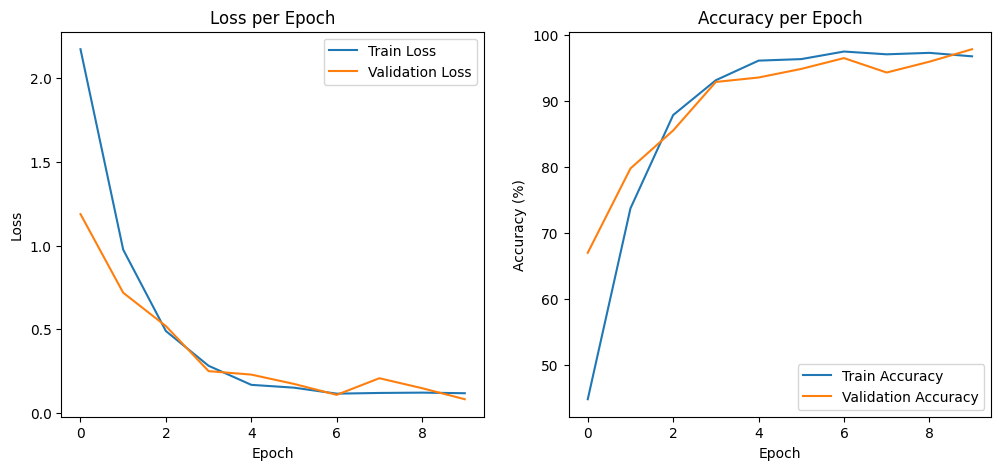

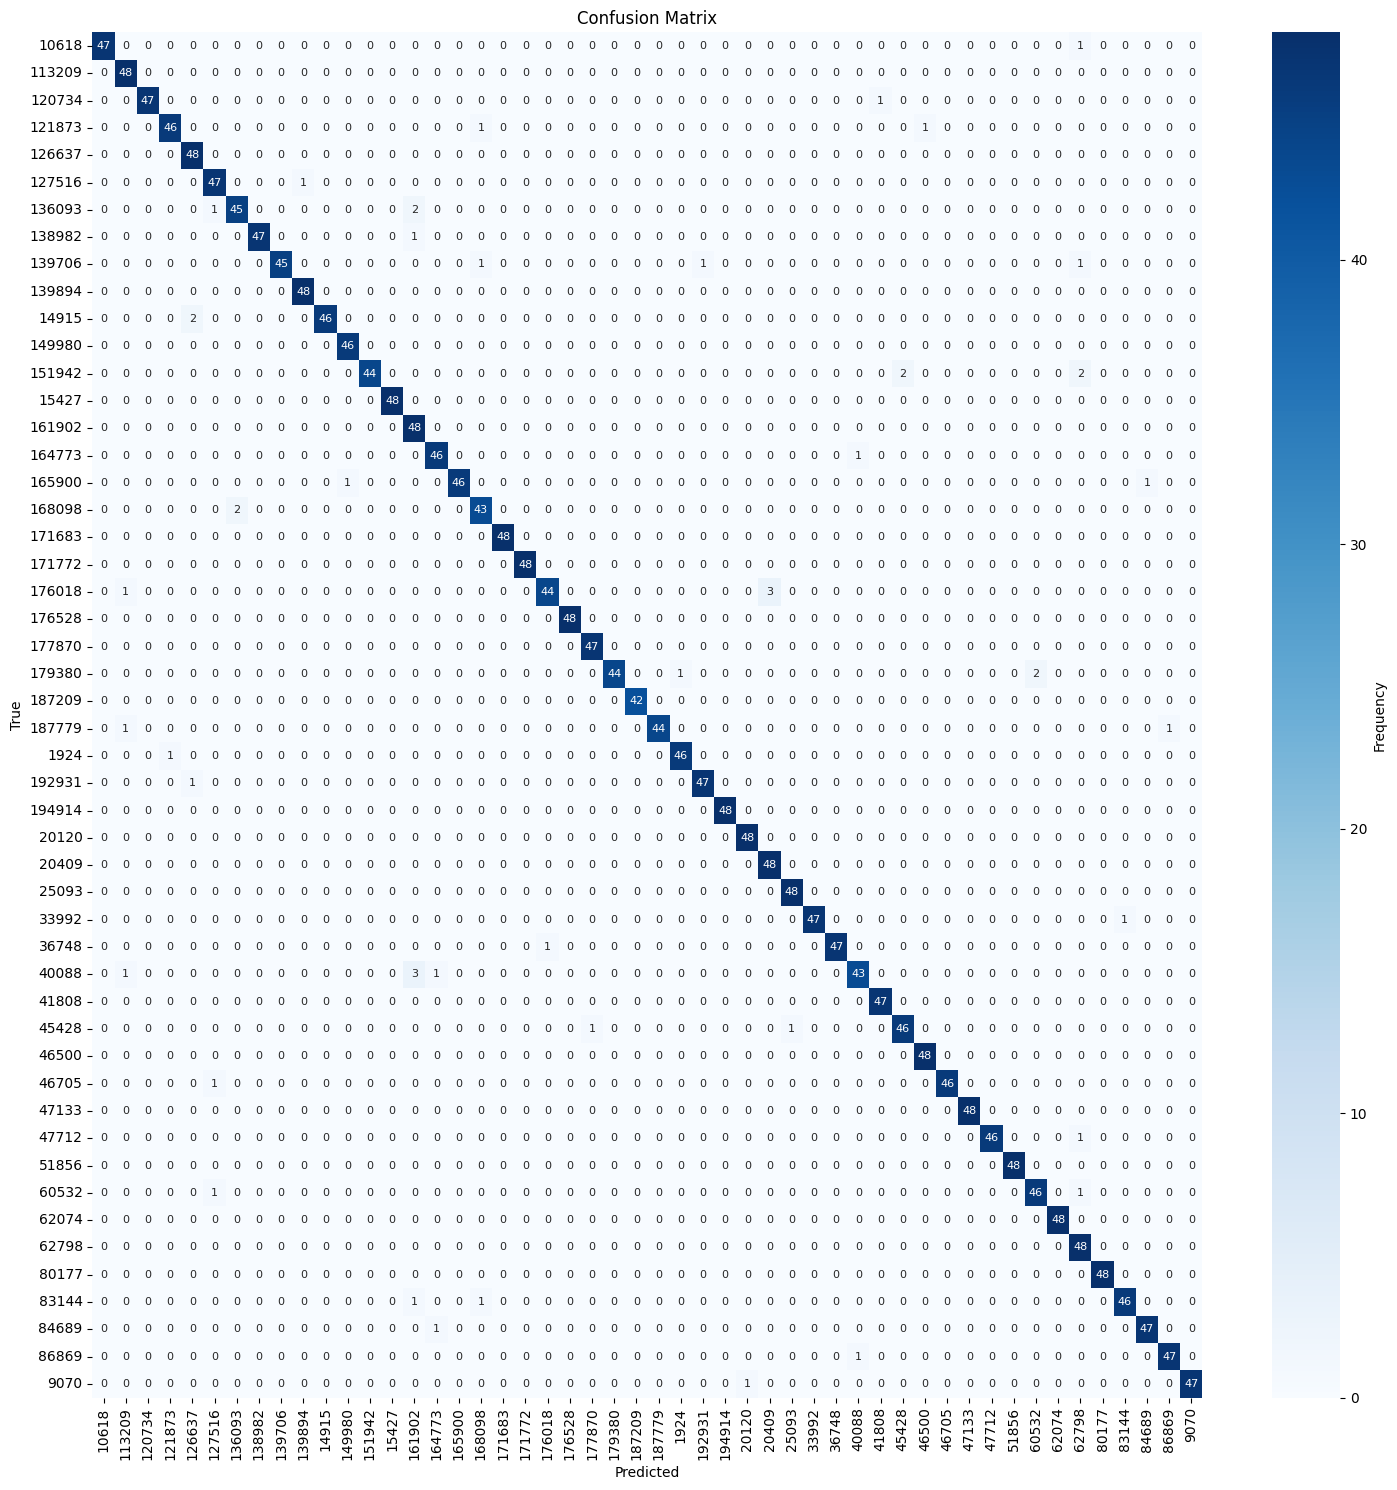

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tqdm import tqdm
import os

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=3, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} / {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Model using Transfer Learning (ResNet50)
class TransferLearningModel(nn.Module):
    def __init__(self, num_classes):
        super(TransferLearningModel, self).__init__()
        self.resnet = models.resnet50(pretrained=True)  # Use pre-trained ResNet-50
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)  # Adjust output layer

    def forward(self, x):
        return self.resnet(x)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Dataset paths
train_dir = '/kaggle/temp/train'
val_dir = '/kaggle/temp/val'

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
                          num_workers=2, pin_memory=(device.type == 'cuda'))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,
                        num_workers=2, pin_memory=(device.type == 'cuda'))

# Model, optimizer, loss
model = TransferLearningModel(num_classes=TOP_N).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
early_stopper = EarlyStopping(patience=5)

# Tracking
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
best_model_path = '/kaggle/working/best_resnet_model.pth'
epochs = 10

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc="Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc="Validating", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = 100 * correct / total
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Train Loss: {epoch_train_loss:.4f}, Acc: {epoch_train_acc:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Acc: {epoch_val_acc:.2f}%")

    # Save best model
    if epoch_val_loss <= min(val_losses):
        torch.save(model.state_dict(), best_model_path)

    # Early stopping
    early_stopper(epoch_val_loss)
    if early_stopper.early_stop:
        print("Early stopping triggered.")
        break

# Load best model
model.load_state_dict(torch.load(best_model_path))

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(15, 15))  # Increase figure size for 50 classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes,
            annot_kws={"size": 8},  # Adjust font size for annotations
            cbar_kws={'label': 'Frequency'})  # Optionally, add a colorbar label
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Ensures everything fits well in the figure
plt.show()


In [7]:
# Save the model
model_save_path = '/kaggle/working/CNN_saved_model.pth'
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /kaggle/working/CNN_saved_model.pth


In [8]:
import torch.onnx

# Set the model to evaluation mode
model.eval()

# Create a dummy input tensor with the same shape as the input to the model
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Adjust this based on your input size (224x224 RGB image)

# Specify the path to save the ONNX model
onnx_model_path = '/kaggle/working/simple_cnn_model.onnx'

# Export the model to ONNX format
torch.onnx.export(model,              # The model to export
                  dummy_input,        # A dummy input tensor
                  onnx_model_path,    # Path where the ONNX model will be saved
                  export_params=True, # Store the trained parameters inside the model file
                  opset_version=12,   # ONNX opset version
                  do_constant_folding=True,  # Optimization for constant folding
                  input_names=['input'],    # Name of the input tensor
                  output_names=['output'],  # Name of the output tensor
                  dynamic_axes={'input': {0: 'batch_size'}, # Variable batch size
                                'output': {0: 'batch_size'}})

print(f"Model successfully saved in ONNX format at {onnx_model_path}")


Model successfully saved in ONNX format at /kaggle/working/simple_cnn_model.onnx


## EfficientNET

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Using device: cuda


100%|██████████| 20.5M/20.5M [00:00<00:00, 164MB/s]



Epoch 1/10


Epoch 1/10 ➤ Train Loss: 1.6634, Train Acc: 55.47%, Val Loss: 0.7189, Val Acc: 78.57%

Epoch 2/10


Epoch 2/10 ➤ Train Loss: 0.5241, Train Acc: 84.61%, Val Loss: 0.3746, Val Acc: 88.82%

Epoch 3/10


Epoch 3/10 ➤ Train Loss: 0.2978, Train Acc: 91.51%, Val Loss: 0.2275, Val Acc: 93.11%

Epoch 4/10


Epoch 4/10 ➤ Train Loss: 0.1944, Train Acc: 94.54%, Val Loss: 0.1382, Val Acc: 95.59%

Epoch 5/10


Epoch 5/10 ➤ Train Loss: 0.1938, Train Acc: 94.18%, Val Loss: 0.2089, Val Acc: 94.12%

Epoch 6/10


Epoch 6/10 ➤ Train Loss: 0.1934, Train Acc: 94.56%, Val Loss: 0.1153, Val Acc: 96.26%

Epoch 7/10


Epoch 7/10 ➤ Train Loss: 0.1352, Train Acc: 96.17%, Val Loss: 0.2381, Val Acc: 93.87%

Epoch 8/10


Epoch 8/10 ➤ Train Loss: 0.1434, Train Acc: 95.84%, Val Loss: 0.0916, Val Acc: 97.39%

Epoch 9/10


Epoch 9/10 ➤ Train Loss: 0.1023, Train Acc: 97.18%, Val Loss: 0.1017, Val Acc: 97.56%

Epoch 10/10


Epoch 10/10 ➤ Train Loss: 0.1343, Train Acc: 96.09%, Val Loss: 0.1138, Val Acc: 96.60%


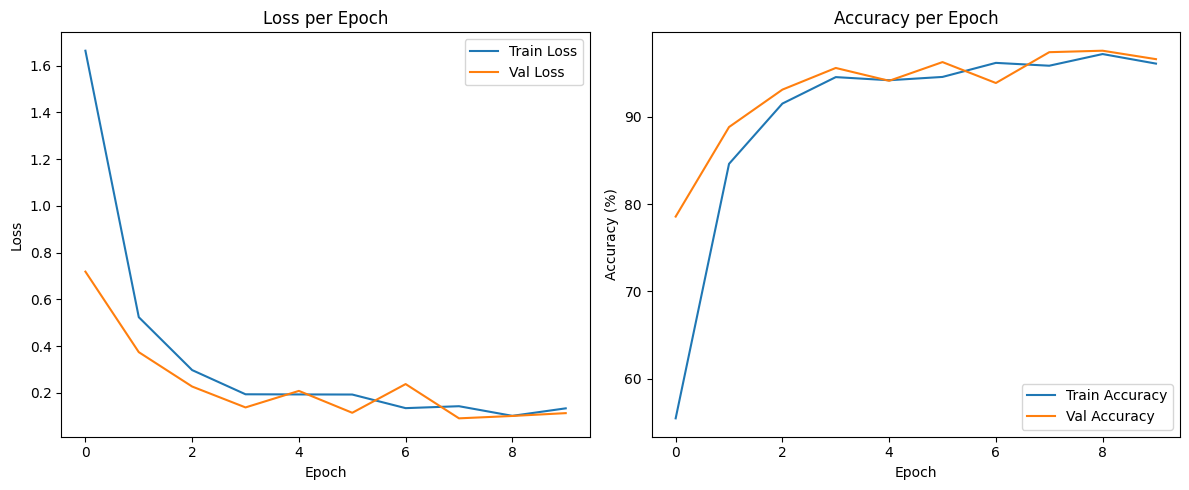

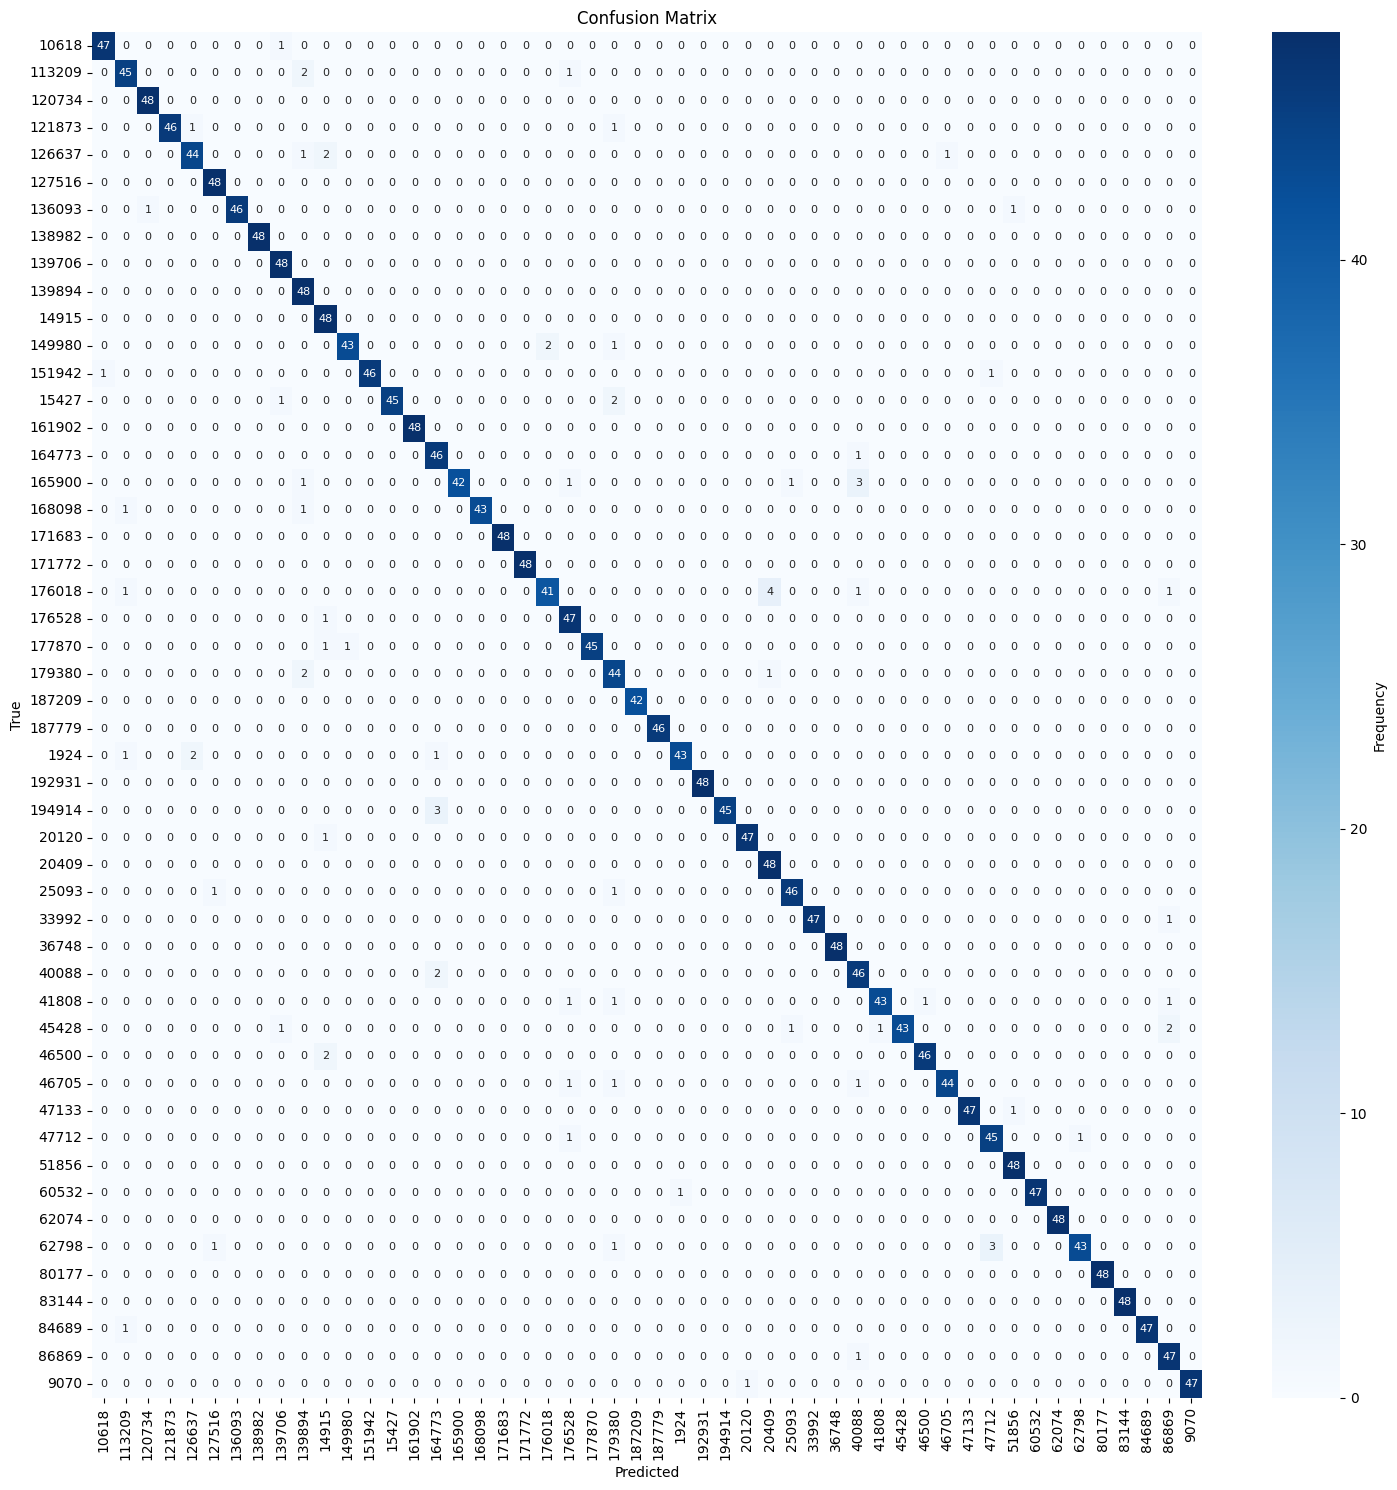

In [9]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load ImageNet-pretrained EfficientNet B0
num_classes = TOP_N
model = models.efficientnet_b0(pretrained=True)

# Replace the final fully connected layer to match our num_classes
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

# Data transformations (Resize to 224 for ImageNet models)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset paths
train_dir = '/kaggle/temp/train'
val_dir = '/kaggle/temp/val'

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
                          num_workers=4, pin_memory=(device.type == 'cuda'))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,
                        num_workers=4, pin_memory=(device.type == 'cuda'))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training setup
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
epochs = 10
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_tqdm = tqdm(train_loader, desc="Training", leave=False)
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        train_loader_tqdm.set_postfix(loss=loss.item())

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    all_labels, all_preds = [], []

    val_loader_tqdm = tqdm(val_loader, desc="Validating", leave=False)
    with torch.no_grad():
        for inputs, labels in val_loader_tqdm:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            val_loader_tqdm.set_postfix(loss=loss.item())

    val_losses.append(running_val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch {epoch + 1}/{epochs} ➤ "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), val_accuracies, label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(15, 15))  # Increase figure size for 50 classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes,
            annot_kws={"size": 8},  # Adjust font size for annotations
            cbar_kws={'label': 'Frequency'})  # Optionally, add a colorbar label
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Ensures everything fits well in the figure
plt.show()


In [10]:
# Save the model
model_save_path = '/kaggle/working/RESNET18_saved_model.pth'
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /kaggle/working/RESNET18_saved_model.pth


In [11]:
import torch.onnx

# Set the model to evaluation mode
model.eval()

# Create a dummy input tensor with the same shape as the input to the model
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Adjust this based on your input size (224x224 RGB image)

# Specify the path to save the ONNX model
onnx_model_path = '/kaggle/working/efficient_cnn_model.onnx'

# Export the model to ONNX format
torch.onnx.export(model,              # The model to export
                  dummy_input,        # A dummy input tensor
                  onnx_model_path,    # Path where the ONNX model will be saved
                  export_params=True, # Store the trained parameters inside the model file
                  opset_version=12,   # ONNX opset version
                  do_constant_folding=True,  # Optimization for constant folding
                  input_names=['input'],    # Name of the input tensor
                  output_names=['output'],  # Name of the output tensor
                  dynamic_axes={'input': {0: 'batch_size'}, # Variable batch size
                                'output': {0: 'batch_size'}})

print(f"Model successfully saved in ONNX format at {onnx_model_path}")


Model successfully saved in ONNX format at /kaggle/working/efficient_cnn_model.onnx


## protoNet

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms, datasets
import os
import numpy as np
from PIL import Image
import random
from tqdm import tqdm

# Ensure reproducibility
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Configurations
N_WAY = 5  # Number of classes per episode
K_SHOT = 5  # Support examples per class
Q_QUERY = 5  # Query examples per class
EPISODES = 100  # Number of training episodes
BATCH_SIZE = 1  # Batch size per episode

# Dataset paths
root_dir = '/kaggle/temp/train'

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
class FewShotDataset:
    def __init__(self, root_dir, transform):
        self.dataset = datasets.ImageFolder(root=root_dir, transform=transform)
        self.class_to_idx = self.dataset.class_to_idx
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}

        self.data_by_class = {}
        for img_path, label in self.dataset.samples:
            if label not in self.data_by_class:
                self.data_by_class[label] = []
            self.data_by_class[label].append(img_path)

    def get_episode(self, n_way=N_WAY, k_shot=K_SHOT, q_query=Q_QUERY):
        selected_classes = random.sample(list(self.data_by_class.keys()), n_way)

        support_images, support_labels = [], []
        query_images, query_labels = [], []

        for class_idx, class_label in enumerate(selected_classes):
            all_images = self.data_by_class[class_label]
            selected_images = random.sample(all_images, k_shot + q_query)
            support = selected_images[:k_shot]
            query = selected_images[k_shot:]

            support_images.extend([(img, class_idx) for img in support])
            query_images.extend([(img, class_idx) for img in query])

        return support_images, query_images

    def load_images(self, items):
        images = [self.dataset.loader(path) for path, _ in items]
        images = [transform(img).unsqueeze(0) for img in images]
        labels = [label for _, label in items]
        return torch.cat(images, dim=0), torch.tensor(labels)

# Model Definition
class ProtoNet(nn.Module):
    def __init__(self):
        super(ProtoNet, self).__init__()
        efficientnet = models.efficientnet_b0(pretrained=True)
        self.encoder = nn.Sequential(*list(efficientnet.children())[:-1])  # remove classifier

    def forward(self, x):
        x = self.encoder(x)
        return x.view(x.size(0), -1)

# Distance function
def euclidean_distance(a, b):
    n = a.size(0)
    m = b.size(0)
    a = a.unsqueeze(1).expand(n, m, -1)
    b = b.unsqueeze(0).expand(n, m, -1)
    return torch.pow(a - b, 2).sum(2)

# Training Loop
dataset = FewShotDataset(root_dir, transform)
model = ProtoNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for episode in range(EPISODES):
    model.train()
    support_items, query_items = dataset.get_episode()

    support_imgs, support_labels = dataset.load_images(support_items)
    query_imgs, query_labels = dataset.load_images(query_items)

    support_imgs, support_labels = support_imgs.to(device), support_labels.to(device)
    query_imgs, query_labels = query_imgs.to(device), query_labels.to(device)

    # Encode features
    support_embeddings = model(support_imgs)
    query_embeddings = model(query_imgs)

    # Compute prototypes
    prototypes = []
    for c in torch.unique(support_labels):
        proto = support_embeddings[support_labels == c].mean(0)
        prototypes.append(proto)
    prototypes = torch.stack(prototypes)

    # Compute distances and logits
    dists = euclidean_distance(query_embeddings, prototypes)
    logits = -dists

    loss = F.cross_entropy(logits, query_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    acc = (logits.argmax(dim=1) == query_labels).float().mean()
    print(f"Episode {episode + 1}/{EPISODES} - Loss: {loss.item():.4f}, Acc: {acc.item() * 100:.2f}%")


Using device: cuda
Episode 1/100 - Loss: 3.7629, Acc: 64.00%
Episode 2/100 - Loss: 2.8110, Acc: 72.00%
Episode 3/100 - Loss: 0.9859, Acc: 88.00%
Episode 4/100 - Loss: 5.2555, Acc: 44.00%
Episode 5/100 - Loss: 1.0223, Acc: 92.00%
Episode 6/100 - Loss: 2.8123, Acc: 76.00%
Episode 7/100 - Loss: 4.2742, Acc: 56.00%
Episode 8/100 - Loss: 1.3183, Acc: 84.00%
Episode 9/100 - Loss: 0.4505, Acc: 96.00%
Episode 10/100 - Loss: 6.2329, Acc: 52.00%
Episode 11/100 - Loss: 7.9585, Acc: 56.00%
Episode 12/100 - Loss: 8.3112, Acc: 56.00%
Episode 13/100 - Loss: 2.7970, Acc: 76.00%
Episode 14/100 - Loss: 2.3555, Acc: 76.00%
Episode 15/100 - Loss: 2.6945, Acc: 56.00%
Episode 16/100 - Loss: 5.1686, Acc: 60.00%
Episode 17/100 - Loss: 4.6038, Acc: 52.00%
Episode 18/100 - Loss: 3.7718, Acc: 64.00%
Episode 19/100 - Loss: 1.7386, Acc: 80.00%
Episode 20/100 - Loss: 3.7404, Acc: 56.00%
Episode 21/100 - Loss: 2.5277, Acc: 52.00%
Episode 22/100 - Loss: 1.5272, Acc: 64.00%
Episode 23/100 - Loss: 2.6670, Acc: 56.00%
E

In [16]:
# # -----------------------------
# # Evaluation Function
# # -----------------------------
# def evaluate(model, dataset, episodes=100):
#     model.eval()
#     acc_all = []

#     with torch.no_grad():
#         for _ in tqdm(range(episodes), desc="Evaluating"):
#             support_items, query_items = dataset.get_episode()
#             support_imgs, support_labels = dataset.load_images(support_items)
#             query_imgs, query_labels = dataset.load_images(query_items)

#             support_imgs, support_labels = support_imgs.to(device), support_labels.to(device)
#             query_imgs, query_labels = query_imgs.to(device), query_labels.to(device)

#             # Get embeddings
#             support_embeddings = model(support_imgs)
#             query_embeddings = model(query_imgs)

#             # Compute prototypes
#             prototypes = []
#             for c in torch.unique(support_labels):
#                 proto = support_embeddings[support_labels == c].mean(0)
#                 prototypes.append(proto)
#             prototypes = torch.stack(prototypes)

#             # Compute logits and accuracy
#             dists = euclidean_distance(query_embeddings, prototypes)
#             logits = -dists
#             pred = logits.argmax(dim=1)
#             acc = (pred == query_labels).float().mean().item()
#             acc_all.append(acc)

#     acc_all = np.array(acc_all)
#     mean_acc = np.mean(acc_all)
#     ci95 = 1.96 * np.std(acc_all) / np.sqrt(len(acc_all))
#     print(f"\nEvaluation over {episodes} episodes:")
#     print(f"Avg Accuracy: {mean_acc * 100:.2f}% ± {ci95 * 100:.2f}%")

# # -----------------------------
# # Run Evaluation After Training
# # -----------------------------
# evaluate(model, dataset)


Evaluating: 100%|██████████| 100/100 [02:28<00:00,  1.49s/it]


Evaluation over 100 episodes:
Avg Accuracy: 70.40% ± 2.33%


Evaluating: 100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


Evaluation over 100 episodes:
Avg Accuracy: 69.40% ± 2.18%


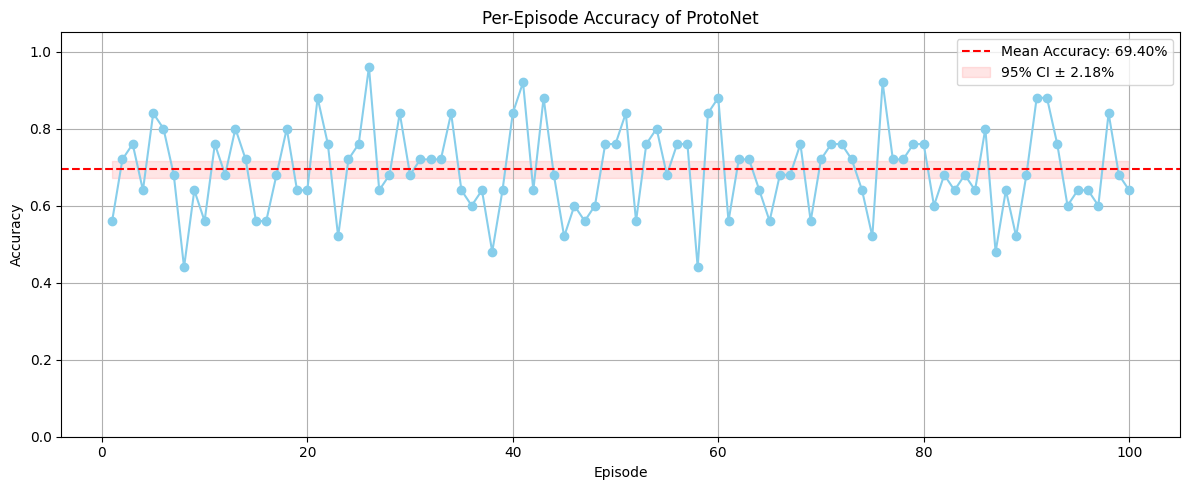

In [17]:
import matplotlib.pyplot as plt

def evaluate(model, dataset, episodes=100):
    model.eval()
    acc_all = []

    with torch.no_grad():
        for ep in tqdm(range(episodes), desc="Evaluating"):
            support_items, query_items = dataset.get_episode()
            support_imgs, support_labels = dataset.load_images(support_items)
            query_imgs, query_labels = dataset.load_images(query_items)

            support_imgs, support_labels = support_imgs.to(device), support_labels.to(device)
            query_imgs, query_labels = query_imgs.to(device), query_labels.to(device)

            support_embeddings = model(support_imgs)
            query_embeddings = model(query_imgs)

            prototypes = []
            for c in torch.unique(support_labels):
                proto = support_embeddings[support_labels == c].mean(0)
                prototypes.append(proto)
            prototypes = torch.stack(prototypes)

            dists = euclidean_distance(query_embeddings, prototypes)
            logits = -dists
            pred = logits.argmax(dim=1)
            acc = (pred == query_labels).float().mean().item()
            acc_all.append(acc)

    acc_all = np.array(acc_all)
    mean_acc = np.mean(acc_all)
    ci95 = 1.96 * np.std(acc_all) / np.sqrt(len(acc_all))
    
    print(f"\nEvaluation over {episodes} episodes:")
    print(f"Avg Accuracy: {mean_acc * 100:.2f}% ± {ci95 * 100:.2f}%")

    # --- Plotting accuracy over episodes ---
    plt.figure(figsize=(12, 5))
    plt.plot(range(1, episodes + 1), acc_all, marker='o', linestyle='-', color='skyblue')
    plt.axhline(mean_acc, color='red', linestyle='--', label=f'Mean Accuracy: {mean_acc * 100:.2f}%')
    plt.fill_between(range(1, episodes + 1),
                     mean_acc - ci95,
                     mean_acc + ci95,
                     color='red', alpha=0.1, label=f'95% CI ± {ci95 * 100:.2f}%')
    plt.title('Per-Episode Accuracy of ProtoNet')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

evaluate(model, dataset)


In [18]:
# Save PyTorch model
torch.save(model.state_dict(), '/kaggle/working/protonet_model.pt')
print("Model saved as PyTorch .pt file.")


Model saved as PyTorch .pt file.


In [19]:
# Export to ONNX
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Batch of 1 image
torch.onnx.export(
    model,                         # model to export
    dummy_input,                   # dummy input
    "/kaggle/working/protonet_model.onnx",  # save path
    export_params=True,
    opset_version=11,
    do_constant_folding=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)
print("Model exported to ONNX format.")


Model exported to ONNX format.


In [31]:
import torch

# Clears the CUDA memory cache
torch.cuda.empty_cache()

# Check allocated and reserved memory
allocated_memory = torch.cuda.memory_allocated()  # Memory actually allocated
reserved_memory = torch.cuda.memory_reserved()  # Memory reserved by PyTorch's caching allocator

print(f"Allocated memory: {allocated_memory}")
print(f"Reserved memory: {reserved_memory}")


Allocated memory: 16098483712
Reserved memory: 16712204288


In [32]:
torch.cuda.empty_cache()


In [33]:
allocated_memory = torch.cuda.memory_allocated()  # Memory actually allocated
reserved_memory = torch.cuda.memory_reserved()  # Memory reserved by PyTorch's caching allocator

print(f"Allocated memory: {allocated_memory}")
print(f"Reserved memory: {reserved_memory}")


Allocated memory: 16098483712
Reserved memory: 16712204288
